# 使用h5py存储cifar10的训练图片
## h5py简介
### HDF5
HDF5是用于存储和管理数据的数据模型，库和文件格式。它支持无限种类的数据类型，旨在实现灵活高效的I/O以及高容量和复杂数据。HDF5是可移植的，并且是可扩展的，允许应用程序在使用HDF5时不断发展。
### h5py
h5py是操作和使用HDF5数据的常用包，它是HDF5二进制数据格式的Python接口。  
一个h5py文件是 “dataset” 和 “group” 两种对象的容器。
1. dataset : 类似数组的数据集合，像numpy数组一样工作 
2. group : 像文件夹一样的容器，存放dataset和其他group，像字典一样工作

### 导入库

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py

%matplotlib inline

E:\ruanjian\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 定义函数获取数据集的路径列表与标签列表

In [2]:
def get_files(file_dir):
    image_list = []
    label_list = []
    for i in range(10):
        for file in os.listdir(file_dir + "/{}".format(i)):              
            image_list.append(file_dir + "/{}".format(i) + "/"+ file)    
            label_list.append(i)
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)
    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1].astype(np.int))
    return image_list, label_list

### 读取训练集/测试集的路径列表和标签列表
**数据集文件夹命名方式：**test文件夹下包含10个子文件夹，分别命名0-9，对应10个类别，每个子文件夹包含1000张图片。train文件夹下包含10个子文件夹，分别命名0-9，对应10个类别，每个子文件夹包含5000张图片。

In [ ]:
test_dir = "C:/Users/xufabing/ML_learning/create_hdf5_dataset/datasets/cifar10/test"
train_dir = "C:/Users/xufabing/ML_learning/create_hdf5_dataset/datasets/cifar10/train"
test_image_list, test_label_list = get_files(test_dir)
train_image_list, train_label_list = get_files(train_dir)

### 定义标签对应的类别

In [21]:
classes_list = [b'plane',b'car',b'bird',b'cat',b'dear',b'dog',b'frog',b'horse',b'ship',b'truck']

### 将所有测试集图片转换为numpy数组

In [6]:
test_image = np.zeros((len(test_image_list),32,32,3))
test_label = np.zeros((len(test_label_list),1))
for i in range(len(test_image_list)):
    test_image[i] = np.array(mpimg.imread(test_image_list[i]))
    test_label[i] = np.array(test_label_list[i])

### 将所有训练集图片转换为numpy数组

In [7]:
train_image = np.zeros((len(train_image_list),32,32,3))
train_label = np.zeros((len(train_label_list),1))
for i in range(len(train_image_list)):
    train_image[i] = np.array(mpimg.imread(train_image_list[i]))
    train_label[i] = np.array(train_label_list[i])

### 将训练集数据存储到h5文件

In [22]:
f = h5py.File("test_cifar10.h5", "w")
f.create_dataset("X_test", data=test_image, dtype=np.uint8)
f.create_dataset("y_test", data=test_label, dtype=np.uint8)
f.create_dataset("classes_list", data=classes_list)
f.close()

### 将测试集数据存储到h5文件

In [23]:
f = h5py.File("train_cifar10.h5", "w")
f.create_dataset("X_train", data=train_image, dtype=np.uint8)
f.create_dataset("y_train", data=train_label, dtype=np.uint8)
f.create_dataset("classes_list", data=classes_list)
f.close()

### 导入数据集

In [32]:
def load_dataset():
    train_dataset = h5py.File('train_cifar10.h5', "r")
    train_set_x_orig = np.array(train_dataset["X_train"][:])
    train_set_y_orig = np.array(train_dataset["y_train"][:])

    test_dataset = h5py.File('test_cifar10.h5', "r")
    test_set_x_orig = np.array(test_dataset["X_test"][:])
    test_set_y_orig = np.array(test_dataset["y_test"][:])

    classes = np.array(test_dataset["classes_list"][:])
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [33]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### 打印数据集各个参数的大小

In [34]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)
print(classes.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10,)


### 数据集测试与部分数据可视化

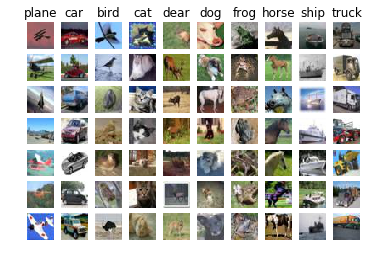

In [31]:
list_classes = []
for i in range(10):
    list_classes.append(classes[i].decode('utf-8'))
num_classes = len(list_classes)
num_each_class = 7
for y, cls in enumerate(list_classes):
    idxs = np.flatnonzero(train_set_y == y)
    idxs = np.random.choice(idxs, num_each_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + (y + 1)
        plt.subplot(num_each_class, num_classes, plt_idx)
        plt.imshow(train_set_x_orig[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()